To run this, press "*Runtime*" and press "*Run all*" on a **free** Tesla T4 Google Colab instance!
<div class="align-center">
<a href="https://unsloth.ai/"><img src="https://github.com/unslothai/unsloth/raw/main/images/unsloth%20new%20logo.png" width="115"></a>
<a href="https://discord.gg/unsloth"><img src="https://github.com/unslothai/unsloth/raw/main/images/Discord button.png" width="145"></a>
<a href="https://unsloth.ai/docs/"><img src="https://github.com/unslothai/unsloth/blob/main/images/documentation%20green%20button.png?raw=true" width="125"></a> Join Discord if you need help + ⭐ <i>Star us on <a href="https://github.com/unslothai/unsloth">Github</a> </i> ⭐
</div>

To install Unsloth on your local device, follow [our guide](https://unsloth.ai/docs/get-started/install). This notebook is licensed [LGPL-3.0](https://github.com/unslothai/notebooks?tab=LGPL-3.0-1-ov-file#readme).

You will learn how to do [data prep](#Data), how to [train](#Train), how to [run the model](#Inference), & how to save it

### News

You can now train embedding models 1.8-3.3x faster with 20% less VRAM. [Blog](https://unsloth.ai/docs/new/embedding-finetuning)

Ultra Long-Context Reinforcement Learning is here with 7x more context windows! [Blog](https://unsloth.ai/docs/new/grpo-long-context)

3x faster LLM training with 30% less VRAM and 500K context. [3x faster](https://unsloth.ai/docs/new/3x-faster-training-packing) • [500K Context](https://unsloth.ai/docs/new/500k-context-length-fine-tuning)

New in Reinforcement Learning: [FP8 RL](https://unsloth.ai/docs/new/fp8-reinforcement-learning) • [Vision RL](https://unsloth.ai/docs/new/vision-reinforcement-learning-vlm-rl) • [Standby](https://unsloth.ai/docs/basics/memory-efficient-rl) • [gpt-oss RL](https://unsloth.ai/docs/new/gpt-oss-reinforcement-learning)

Visit our docs for all our [model uploads](https://unsloth.ai/docs/get-started/unsloth-model-catalog) and [notebooks](https://unsloth.ai/docs/get-started/unsloth-notebooks).

### Installation

In [ ]:
%%capture
import os

!pip install pip3-autoremove
!pip install torch torchvision torchaudio xformers --index-url https://download.pytorch.org/whl/cu128
!pip install unsloth
!pip install transformers==4.56.2
!pip install --no-deps trl==0.22.2

### Unsloth

In [ ]:
from unsloth import FastVisionModel # FastLanguageModel for LLMs
import torch
from transformers import AutoModelForCausalLM ,AutoProcessor
# 4bit pre quantized models we support for 4x faster downloading + no OOMs.
fourbit_models = [
    "unsloth/Qwen3-VL-8B-Instruct-bnb-4bit", # Qwen 3 vision support
    "unsloth/Qwen3-VL-8B-Thinking-bnb-4bit",
    "unsloth/Qwen3-VL-32B-Instruct-bnb-4bit",
    "unsloth/Qwen3-VL-32B-Thinking-bnb-4bit",
] # More models at https://huggingface.co/unsloth

model_path = "unsloth/PaddleOCR-VL"
model, tokenizer = FastVisionModel.from_pretrained(
    model_path,
    max_seq_length = 2048, # Choose any for long context!
    load_in_4bit = False,     # 4bit uses much less memory
    load_in_8bit = False,    # A bit more accurate, uses 2x memory
    full_finetuning = True, # We support full finetuning now!
    auto_model = AutoModelForCausalLM,
    trust_remote_code = True,
    unsloth_force_compile = True,
)

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!

Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
A new version of the following files was downloaded from https://huggingface.co/unsloth/PaddleOCR-VL:
- configuration_paddleocr_vl.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.

Unsloth: WARNING `trust_remote_code` is True.
Are you certain you want to do remote code execution?
==((====))==  Unsloth 2025.12.5: Fast Paddleocr_Vl patching. Transformers: 4.56.2.
   \\   /|    Tesla T4. Num GPUs = 1. Max memory: 14.741 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.9.0+cu126. CUDA: 7.5. CUDA Toolkit: 12.6. Triton: 3.5.0
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.33.post1. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!
Unsloth: Float16 full finetuning uses more memory since we upcast weights to float32.

modeling_paddleocr_vl.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/unsloth/PaddleOCR-VL:
- modeling_paddleocr_vl.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.

model.safetensors:   0%|          | 0.00/1.92G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/133 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.model:   0%|          | 0.00/1.61M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/11.2M [00:00<?, ?B/s]

added_tokens.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

chat_template.jinja: 0.00B [00:00, ?B/s]

We now load the processor

In [3]:
processor = AutoProcessor.from_pretrained(model_path, trust_remote_code = True)

processor_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

processing_paddleocr_vl.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/unsloth/PaddleOCR-VL:
- processing_paddleocr_vl.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.

preprocessor_config.json:   0%|          | 0.00/641 [00:00<?, ?B/s]

image_processing_paddleocr_vl.py: 0.00B [00:00, ?B/s]

We now add LoRA adapters for parameter efficient finetuning - this allows us to only efficiently train 1% of all parameters.

**[NEW]** We also support finetuning ONLY the vision part of the model, or ONLY the language part. Or you can select both! You can also select to finetune the attention or the MLP layers!

In [4]:
model = FastVisionModel.get_peft_model(
    model,
    r = 64,
    lora_alpha = 64,
    lora_dropout = 0,
    bias = "none",
    random_state = 3407,
    use_rslora = False,
    target_modules = [
      "q_proj", "k_proj", "v_proj", "o_proj",
      "gate_proj", "up_proj", "down_proj",
      "out_proj", "fc1", "fc2",
      "linear_1", "linear_2"
    ]
)

Unsloth: Full finetuning is enabled, so .get_peft_model has no effect


<a name="Data"></a>
### Data Prep
We'll be using a sampled dataset of handwritten maths formulas. The goal is to convert these images into a computer readable form - ie in LaTeX form, so we can render it. This can be very useful for complex formulas.

You can access the dataset [here](https://huggingface.co/datasets/unsloth/LaTeX_OCR). The full dataset is [here](https://huggingface.co/datasets/linxy/LaTeX_OCR).

In [5]:
from datasets import load_dataset
dataset = load_dataset("unsloth/LaTeX_OCR", split = "train")

README.md:   0%|          | 0.00/519 [00:00<?, ?B/s]

data/train-00000-of-00001.parquet:   0%|          | 0.00/344M [00:00<?, ?B/s]

data/test-00000-of-00001.parquet:   0%|          | 0.00/38.2M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/68686 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7632 [00:00<?, ? examples/s]

Let's take an overview look at the dataset. We shall see what the 3rd image is, and what caption it had.

In [6]:
dataset

Dataset({
    features: ['image', 'text'],
    num_rows: 68686
})

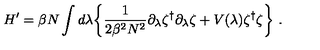

In [7]:
dataset[2]["image"]

In [8]:
dataset[2]["text"]

'H ^ { \\prime } = \\beta N \\int d \\lambda \\biggl \\{ \\frac { 1 } { 2 \\beta ^ { 2 } N ^ { 2 } } \\partial _ { \\lambda } \\zeta ^ { \\dagger } \\partial _ { \\lambda } \\zeta + V ( \\lambda ) \\zeta ^ { \\dagger } \\zeta \\biggr \\} \\ .'

We can also render the LaTeX in the browser directly!

In [9]:
from IPython.display import display, Math, Latex

latex = dataset[2]["text"]
display(Math(latex))

<IPython.core.display.Math object>

To format the dataset, all vision finetuning tasks should be formatted as follows:

```python
[
{ "role": "user",
  "content": [{"type": "text",  "text": Q}, {"type": "image", "image": image} ]
},
{ "role": "assistant",
  "content": [{"type": "text",  "text": A} ]
},
]
```

In [10]:
instruction = "OCR:"

def convert_to_conversation(sample):
    conversation = [
        { "role": "user",
          "content" : [
            {"type" : "text",  "text"  : instruction},
            {"type" : "image", "image" : sample["image"]} ]
        },
        { "role" : "assistant",
          "content" : [
            {"type" : "text",  "text"  : sample["text"]} ],
        },
    ]
    return { "images": [sample["image"]],"messages" : conversation }

Let's convert the dataset into the "correct" format for finetuning:

In [11]:
converted_dataset = [convert_to_conversation(sample) for sample in dataset]

We look at how the conversations are structured for the first example:

In [12]:
converted_dataset[0]

{'images': [<PIL.PngImagePlugin.PngImageFile image mode=RGB size=160x40>],
 'messages': [{'role': 'user',
   'content': [{'type': 'text', 'text': 'OCR:'},
    {'type': 'image',
     'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=160x40>}]},
  {'role': 'assistant',
   'content': [{'type': 'text',
     'text': '{ \\frac { N } { M } } \\in { \\bf Z } , { \\frac { M } { P } } \\in { \\bf Z } , { \\frac { P } { Q } } \\in { \\bf Z }'}]}]}

Let's first see before we do any finetuning what the model outputs for the first example!

In [13]:
FastVisionModel.for_inference(model) # Enable for inference!

image = dataset[2]["image"]

instruction = "OCR:"
messages = [
    {"role": "user", "content": [
        {"type": "image"},
        {"type": "text", "text": instruction}
    ]}
]

text_prompt = processor.tokenizer.apply_chat_template(
    messages,
    tokenize = False,
    add_generation_prompt = True
    )

inputs = processor(
    image,
    text_prompt,
    add_special_tokens = False,
    return_tensors = "pt",
).to("cuda")

from transformers import TextStreamer
text_streamer = TextStreamer(tokenizer, skip_prompt = True)
_ = model.generate(**inputs, streamer = text_streamer, max_new_tokens = 128,
                   use_cache = False, temperature = 1.5, min_p = 0.1)

\[H^{\prime}=\beta N\int d\lambda\left\{\frac{1}{2\beta^{2}N^{2}}\partial_{\lambda}\zeta^{\dagger}\partial_{\lambda}\zeta+V(\lambda)\zeta^{\dagger}\zeta\right\}.\]</s>

<a name="Train"></a>
### Train the model
Now let's train our model. We do 60 steps to speed things up, but you can set `num_train_epochs=1` for a full run, and turn off `max_steps=None`. We also support `DPOTrainer` and `GRPOTrainer` for reinforcement learning!!

We use our new `UnslothVisionDataCollator` which will help in our vision finetuning setup.

In [14]:
from trl import SFTTrainer, SFTConfig
from unsloth.trainer import UnslothVisionDataCollator

FastVisionModel.for_training(model) # Enable for training!

custom_collator = UnslothVisionDataCollator(
    model = model,
    processor = processor,
    ignore_index = -100,
    max_seq_length = 2048,
    train_on_responses_only = True,
    instruction_part = "User: ",
    response_part = "\nAssistant:",
    pad_to_multiple_of = 8,
)

trainer = SFTTrainer(
    model = model,
    tokenizer = processor.tokenizer,
    data_collator = custom_collator,
    train_dataset = converted_dataset,
    args = SFTConfig(
        per_device_train_batch_size = 4,
        gradient_accumulation_steps = 2, # Use GA to mimic batch size!
        warmup_steps = 5,
        max_steps = 60,
        # num_train_epochs = 1, # Set this instead of max_steps for full training runs
        learning_rate = 5e-5,
        logging_steps = 1,
        optim = "adamw_8bit",
        weight_decay = 0.001,
        lr_scheduler_type = "linear",
        seed = 3407,
        output_dir = "outputs",
        report_to = "none",

        # You MUST put the below items for vision finetuning:
        remove_unused_columns = False,
        dataset_text_field = "",
        dataset_kwargs = {"skip_prepare_dataset": True},
        max_length = 2048,
        fp16 = not torch.cuda.is_bf16_supported(),
        bf16 = torch.cuda.is_bf16_supported(),
    ),
)

In [15]:
# @title Show current memory stats
gpu_stats = torch.cuda.get_device_properties(0)
start_gpu_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
max_memory = round(gpu_stats.total_memory / 1024 / 1024 / 1024, 3)
print(f"GPU = {gpu_stats.name}. Max memory = {max_memory} GB.")
print(f"{start_gpu_memory} GB of memory reserved.")

GPU = Tesla T4. Max memory = 14.741 GB.
5.225 GB of memory reserved.


In [16]:
trainer_stats = trainer.train()

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 68,686 | Num Epochs = 1 | Total steps = 60
O^O/ \_/ \    Batch size per device = 4 | Gradient accumulation steps = 2
\        /    Data Parallel GPUs = 1 | Total batch size (4 x 2 x 1) = 8
 "-____-"     Trainable parameters = 958,588,736 of 958,588,736 (100.00% trained)


Unsloth: Will smartly offload gradients to save VRAM!


Step,Training Loss
1,2.197100
2,3.188000
3,2.825600
4,2.093900
5,1.419800
6,1.451700
7,1.358700
8,1.514200
9,1.206600
10,0.759800


In [17]:
# @title Show final memory and time stats
used_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
used_memory_for_lora = round(used_memory - start_gpu_memory, 3)
used_percentage = round(used_memory / max_memory * 100, 3)
lora_percentage = round(used_memory_for_lora / max_memory * 100, 3)
print(f"{trainer_stats.metrics['train_runtime']} seconds used for training.")
print(
    f"{round(trainer_stats.metrics['train_runtime']/60, 2)} minutes used for training."
)
print(f"Peak reserved memory = {used_memory} GB.")
print(f"Peak reserved memory for training = {used_memory_for_lora} GB.")
print(f"Peak reserved memory % of max memory = {used_percentage} %.")
print(f"Peak reserved memory for training % of max memory = {lora_percentage} %.")

771.2964 seconds used for training.
12.85 minutes used for training.
Peak reserved memory = 13.59 GB.
Peak reserved memory for training = 8.365 GB.
Peak reserved memory % of max memory = 92.192 %.
Peak reserved memory for training % of max memory = 56.746 %.


<a name="Inference"></a>
### Inference
Let's run the model! You can change the instruction and input - leave the output blank!

We use `min_p = 0.1` and `temperature = 1.5`. Read this [Tweet](https://x.com/menhguin/status/1826132708508213629) for more information on why.

In [18]:
FastVisionModel.for_inference(model) # Enable for inference!

image = dataset[2]["image"]

instruction = "OCR:"
messages = [
    {"role": "user", "content": [
        {"type": "image"},
        {"type": "text", "text": instruction}
    ]}
]

text_prompt = processor.tokenizer.apply_chat_template(
    messages,
    tokenize = False,
    add_generation_prompt = True
    )

inputs = processor(
    image,
    text_prompt,
    add_special_tokens = False,
    return_tensors = "pt",
).to("cuda")

from transformers import TextStreamer
text_streamer = TextStreamer(tokenizer, skip_prompt = True)
_ = model.generate(**inputs, streamer = text_streamer, max_new_tokens = 128,
                   use_cache = False, temperature = 1.5, min_p = 0.1)

H ^ { \prime } = \beta N \int d \lambda \Big \{ \frac { 1 } { 2 \beta ^ { 2 } N ^ { 2 } } \partial _ { \lambda } \zeta ^ { \dagger } \partial _ { \lambda } \zeta + V ( \lambda ) \zeta ^ { \dagger } \zeta \Big \} \ .</s>

<a name="Save"></a>
### Saving, loading finetuned models
To save the final model as LoRA adapters, either use Hugging Face's `push_to_hub` for an online save or `save_pretrained` for a local save.

**[NOTE]** This ONLY saves the LoRA adapters, and not the full model. To save to 16bit or GGUF, scroll down!

In [19]:
model.save_pretrained("paddle_ocr_lora")  # Local saving
tokenizer.save_pretrained("paddle_ocr_lora")
# model.push_to_hub("your_name/paddle_ocr_lora", token = "YOUR_HF_TOKEN") # Online saving
# tokenizer.push_to_hub("your_name/paddle_ocr_lora", token = "YOUR_HF_TOKEN") # Online saving

('lora_model/tokenizer_config.json',
 'lora_model/special_tokens_map.json',
 'lora_model/chat_template.jinja',
 'lora_model/tokenizer.model',
 'lora_model/added_tokens.json',
 'lora_model/tokenizer.json')

Now if you want to load the LoRA adapters we just saved for inference, set `False` to `True`:

In [20]:
if False:
    from unsloth import FastVisionModel
    model, tokenizer = FastVisionModel.from_pretrained(
        model_name = "paddle_ocr_lora", # YOUR MODEL YOU USED FOR TRAINING
        load_in_4bit = False, # Set to False for 16bit LoRA
    )
    FastVisionModel.for_inference(model) # Enable for inference!


from transformers import TextStreamer
text_streamer = TextStreamer(tokenizer, skip_prompt = True)
_ = model.generate(**inputs, streamer = text_streamer, max_new_tokens = 128,
                   use_cache = False, temperature = 1.5, min_p = 0.1)

H ^ { \prime } = \beta N \int d \lambda \Big \{ \frac { 1 } { 2 \beta ^ { 2 } N ^ { 2 } } \partial _ { \lambda } \zeta ^ { \dagger } \partial _ { \lambda } \zeta + V ( \lambda ) \zeta ^ { \dagger } \zeta \Big \} \ .</s>

### Saving to float16 for VLLM

We also support saving to `float16` directly. Select `merged_16bit` for float16. Use `push_to_hub_merged` to upload to your Hugging Face account! You can go to https://huggingface.co/settings/tokens for your personal tokens. See [our docs](https://unsloth.ai/docs/basics/inference-and-deployment) for more deployment options.

In [21]:
# Select ONLY 1 to save! (Both not needed!)

# Save locally to 16bit
if False: model.save_pretrained_merged("unsloth_finetune", tokenizer,)

# To export and save to your Hugging Face account
if False: model.push_to_hub_merged("YOUR_USERNAME/unsloth_finetune", tokenizer, token = "YOUR_HF_TOKEN")

And we're done! If you have any questions on Unsloth, we have a [Discord](https://discord.gg/unsloth) channel! If you find any bugs or want to keep updated with the latest LLM stuff, or need help, join projects etc, feel free to join our Discord!

Some other resources:
1. Looking to use Unsloth locally? Read our [Installation Guide](https://unsloth.ai/docs/get-started/install) for details on installing Unsloth on Windows, Docker, AMD, Intel GPUs.
2. Learn how to do Reinforcement Learning with our [RL Guide and notebooks](https://unsloth.ai/docs/get-started/reinforcement-learning-rl-guide).
3. Read our guides and notebooks for [Text-to-speech (TTS)](https://unsloth.ai/docs/basics/text-to-speech-tts-fine-tuning) and [vision](https://unsloth.ai/docs/basics/vision-fine-tuning) model support.
4. Explore our [LLM Tutorials Directory](https://unsloth.ai/docs/models/tutorials-how-to-fine-tune-and-run-llms) to find dedicated guides for each model.
5. Need help with Inference? Read our [Inference & Deployment page](https://unsloth.ai/docs/basics/inference-and-deployment) for details on using vLLM, llama.cpp, Ollama etc.

<div class="align-center">
  <a href="https://unsloth.ai"><img src="https://github.com/unslothai/unsloth/raw/main/images/unsloth%20new%20logo.png" width="115"></a>
  <a href="https://discord.gg/unsloth"><img src="https://github.com/unslothai/unsloth/raw/main/images/Discord.png" width="145"></a>
  <a href="https://unsloth.ai/docs/"><img src="https://github.com/unslothai/unsloth/blob/main/images/documentation%20green%20button.png?raw=true" width="125"></a>

  Join Discord if you need help + ⭐️ <i>Star us on <a href="https://github.com/unslothai/unsloth">Github</a> </i> ⭐️

  This notebook and all Unsloth notebooks are licensed [LGPL-3.0](https://github.com/unslothai/notebooks?tab=LGPL-3.0-1-ov-file#readme)
</div>